In [54]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# F TRANSFORM

In [55]:
image_simple = np.ones((8,8),dtype=np.uint8)
image_simple

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

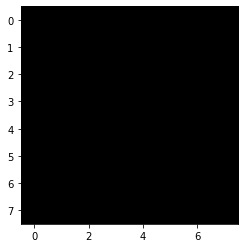

In [56]:
plt.imshow(image_simple,cmap='gray')
plt.show()

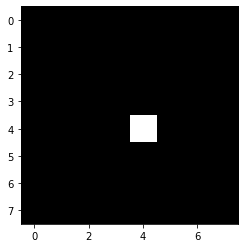

[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         4.17438727 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


In [57]:
f = np.fft.fft2(image_simple)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()
print(np.abs(magnitude_spectrum))

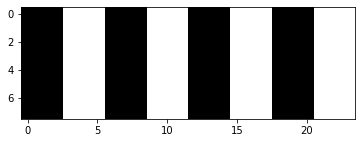

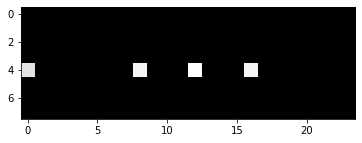

array([[19200.,     0.,     0.,     0., 12800.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,  6400.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 12800.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     

In [58]:
image_simple2 = np.array([(0,0,0,200,200,200),(0,0,0,200,200,200)])
image_simple2 = np.tile(image_simple2,(4,4))
plt.imshow(image_simple2,cmap='gray')
plt.show()

f = np.fft.fft2(image_simple2)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()
np.abs(f)

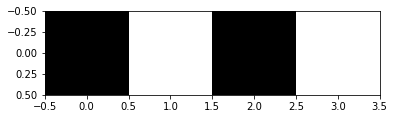

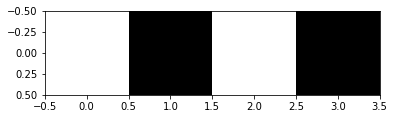

[[400.   0. 400.   0.]]


In [59]:
image_simple3 = np.array([(0,200,0,200)])
plt.imshow(image_simple3,cmap='gray')
plt.show()

f = np.fft.fft2(image_simple3)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()
print(np.abs(f))

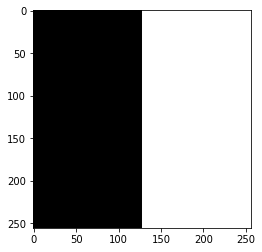

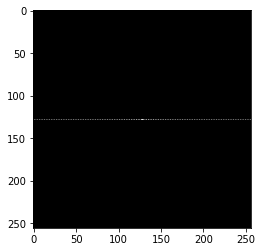

In [60]:
a = np.zeros((256,128),dtype=np.uint8)
b = np.ones((256,128),dtype=np.uint8)
image_simple4 = np.concatenate((a,b),axis=1)
plt.imshow(image_simple4,cmap='gray')
plt.show()

f = np.fft.fft2(image_simple4)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()

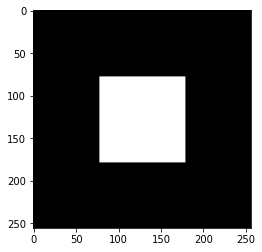

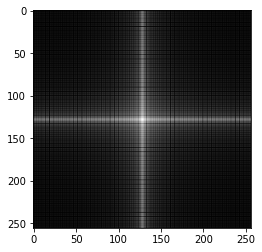

In [61]:
image_simple5 = np.zeros((256,256),dtype=np.uint8)
image_simple5[78:179,78:179] = 1
plt.imshow(image_simple5,cmap='gray')
plt.show()

f = np.fft.fft2(image_simple5)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()

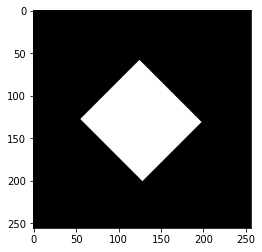

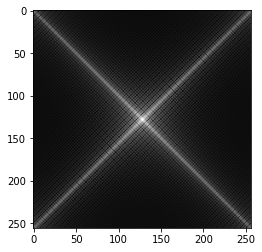

In [62]:
nx ,ny = (256,256)
x = np.linspace(0,nx-1,nx)
y = np.linspace(0,ny-1,ny)
xv, yv = np.meshgrid(x, y, sparse=True)
rotate_box = np.zeros((256,256),dtype=np.bool)
for i in x.astype(np.int32):
  for j in y.astype(np.int32):
    rotate_box[i,j] = (i+j<329)&(i+j>182)&(i-j>-67)&(i-j<73)
image_simple6 = rotate_box.astype(np.uint8)

plt.imshow(image_simple6,cmap='gray')
plt.show()

f = np.fft.fft2(image_simple6)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()

# FILTER

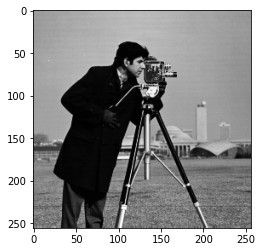

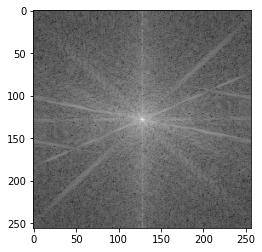

In [72]:
img = cv2.imread('cameraman.tif',0)
plt.imshow(img,cmap='gray')
plt.show()

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()

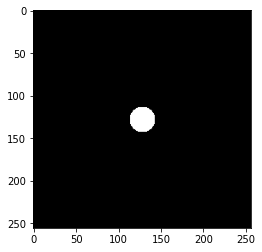

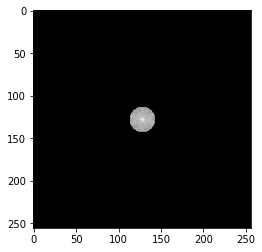

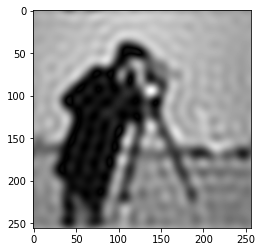

In [73]:
#low pass ideal filter
nx,ny = img.shape
x = np.linspace(-nx/2,nx/2-1,nx)
y = np.linspace(-ny/2,ny/2-1,ny)
D0 = 15

ideal_filter = np.ones((nx,ny),dtype=np.bool)
for i in x.astype(np.int32):
  for j in y.astype(np.int32):
    z = np.sqrt(i*i+j*j)
    ideal_filter[i+int(nx/2),j+int(ny/2)] = z<D0
plt.imshow(ideal_filter,cmap='gray')
plt.show()

image_ft_filter = fshift*ideal_filter
image_ft_filter_spectrum = np.log(1+np.abs(image_ft_filter))
plt.imshow(image_ft_filter_spectrum,cmap='gray')
plt.show()

f_ishift = np.fft.ifftshift(image_ft_filter)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back,cmap='gray')
plt.show()

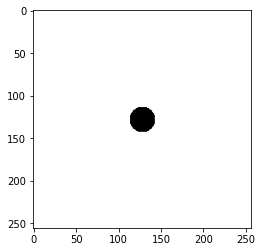

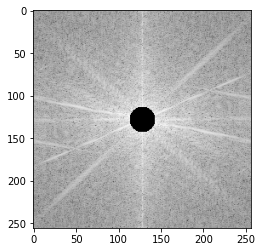

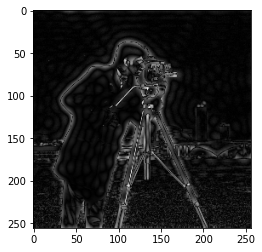

In [71]:
#high pass ideal filter
nx,ny = img.shape
x = np.linspace(-nx/2,nx/2-1,nx)
y = np.linspace(-ny/2,ny/2-1,ny)
D0 = 15

ideal_filter = np.ones((nx,ny),dtype=np.bool)
for i in x.astype(np.int32):
  for j in y.astype(np.int32):
    z = np.sqrt(i*i+j*j)
    ideal_filter[i+int(nx/2),j+int(ny/2)] = z>=D0
plt.imshow(ideal_filter,cmap='gray')
plt.show()

image_ft_filter = fshift*ideal_filter
image_ft_filter_spectrum = np.log(1+np.abs(image_ft_filter))
plt.imshow(image_ft_filter_spectrum,cmap='gray')
plt.show()

f_ishift = np.fft.ifftshift(image_ft_filter)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back,cmap='gray')
plt.show()

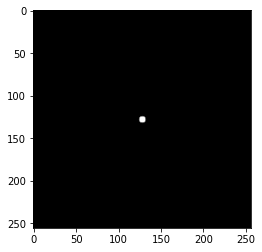

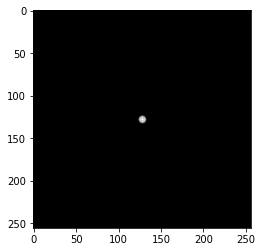

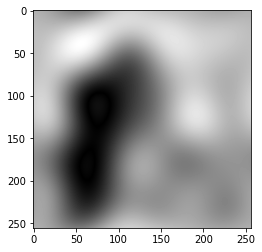

In [77]:
#low pass butterworth filter
nx,ny = img.shape
x = np.linspace(-nx/2,nx/2-1,nx)
y = np.linspace(-ny/2,ny/2-1,ny)

D0 = 15
n = 15

btw_filter = np.ones((nx,ny),dtype=np.float32)
for i in x.astype(np.int32):
  for j in y.astype(np.int32):
    btw_filter[i+int(nx/2),j+int(ny/2)] = 1/(1+((i**2+j**2)/D0)**(2*n))
plt.imshow(btw_filter,cmap='gray')
plt.show()

image_ft_filter = fshift*btw_filter
image_ft_filter_spectrum = np.log(1+np.abs(image_ft_filter))
plt.imshow(image_ft_filter_spectrum,cmap='gray')
plt.show()

f_ishift = np.fft.ifftshift(image_ft_filter)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back,cmap='gray')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':


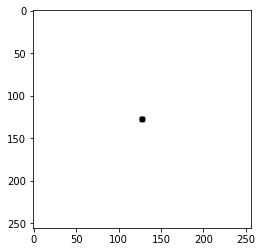

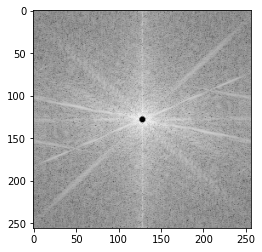

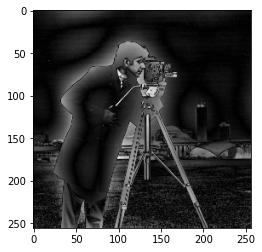

In [78]:
#high pass butterworth filter
nx,ny = img.shape
x = np.linspace(-nx/2,nx/2-1,nx)
y = np.linspace(-ny/2,ny/2-1,ny)

D0 = 15
n = 15

btw_filter = np.ones((nx,ny),dtype=np.float32)
for i in x.astype(np.int32):
  for j in y.astype(np.int32):
    btw_filter[i+int(nx/2),j+int(ny/2)] = 1/(1+(D0/(i**2+j**2))**(2*n))
plt.imshow(btw_filter,cmap='gray')
plt.show()

image_ft_filter = fshift*btw_filter
image_ft_filter_spectrum = np.log(1+np.abs(image_ft_filter))
plt.imshow(image_ft_filter_spectrum,cmap='gray')
plt.show()

f_ishift = np.fft.ifftshift(image_ft_filter)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back,cmap='gray')
plt.show()

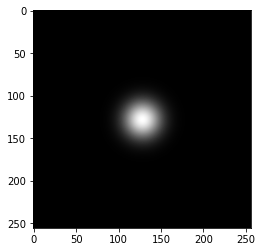

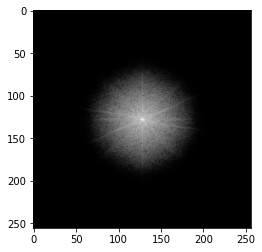

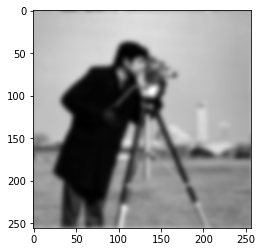

In [79]:
#low pass gaussian filter
nx,ny = img.shape
x = np.linspace(-nx/2,nx/2-1,nx)
y = np.linspace(-ny/2,ny/2-1,ny)

D0 = 15

gaussian_filter = np.ones((nx,ny),dtype=np.float32)
for i in x.astype(np.int32):
  for j in y.astype(np.int32):
    gaussian_filter[i+int(nx/2),j+int(ny/2)] = np.e**(-(i**2+j**2)/(2*D0**2))
plt.imshow(gaussian_filter,cmap='gray')
plt.show()

image_ft_filter = fshift*gaussian_filter
image_ft_filter_spectrum = np.log(1+np.abs(image_ft_filter))
plt.imshow(image_ft_filter_spectrum,cmap='gray')
plt.show()

f_ishift = np.fft.ifftshift(image_ft_filter)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back,cmap='gray')
plt.show()

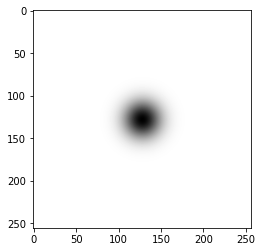

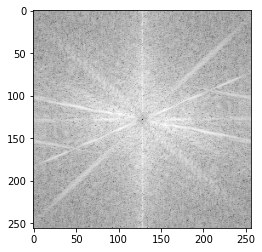

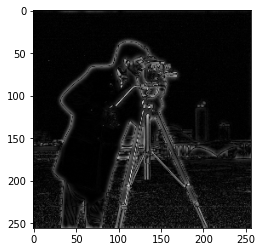

In [80]:
#high pass gaussian filter
nx,ny = img.shape
x = np.linspace(-nx/2,nx/2-1,nx)
y = np.linspace(-ny/2,ny/2-1,ny)

D0 = 15

gaussian_filter = np.ones((nx,ny),dtype=np.float32)
for i in x.astype(np.int32):
  for j in y.astype(np.int32):
    gaussian_filter[i+int(nx/2),j+int(ny/2)] = 1-np.e**(-(i**2+j**2)/(2*D0**2))
plt.imshow(gaussian_filter,cmap='gray')
plt.show()

image_ft_filter = fshift*gaussian_filter
image_ft_filter_spectrum = np.log(1+np.abs(image_ft_filter))
plt.imshow(image_ft_filter_spectrum,cmap='gray')
plt.show()

f_ishift = np.fft.ifftshift(image_ft_filter)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back,cmap='gray')
plt.show()